In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import math
import matplotlib.pyplot as plt
from scipy.stats import norm, entropy 
from scipy.stats import probplot
import matplotlib.pyplot as plt
from scipy.stats import logistic
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.utils import resample
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from scipy.spatial.distance import cosine, correlation
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import Perceptron

In [2]:
df  = pd.read_csv('/Users/hiteshbhatia/Downloads/chs2016_public.csv')

**Pre Processing the Data**
We will first proceed with doing the analysis on the HIV Testing. We will be analysing the HIV with the general health as the target variable.

In [3]:
hiv_df = df[['cid','hiv12months16','everhivtest16','generalhealth']]
#Checking the null values
hiv_df.isnull().sum()

cid                0
hiv12months16    252
everhivtest16    328
generalhealth     89
dtype: int64

In [4]:
#Dropping all the columns having the Null values
hiv_df = hiv_df.dropna()
hiv_df.describe()

,cid,hiv12months16,everhivtest16,generalhealth
count,9.435000e+03,9435.000000,9435.000000,9435.000000
mean,1.707512e+06,1.672496,1.360890,2.739587
std,5.179347e+03,0.469328,0.480284,1.139569
min,1.700001e+06,1.000000,1.000000,1.000000
25%,1.702543e+06,1.000000,1.000000,2.000000
50%,1.710003e+06,2.000000,1.000000,3.000000
75%,1.712484e+06,2.000000,2.000000,3.000000
max,1.714953e+06,2.000000,2.000000,5.000000


In [5]:
corr_1 = hiv_df.corr()
corr_1

,cid,hiv12months16,everhivtest16,generalhealth
cid,1.000000,-0.144314,-0.147612,-0.090600
hiv12months16,-0.144314,1.000000,0.524401,-0.005089
everhivtest16,-0.147612,0.524401,1.000000,0.041002
generalhealth,-0.090600,-0.005089,0.041002,1.000000


It seems like the variable **hiv12months16** (Have you had an HIV test in the last 12 months?) is very less correlated and thus can be dropped.

# Prediction / RMSE

In [6]:
#[1]https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
#[2]https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.random_projection import sparse_random_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from math import sqrt

#function for rmse calculation of model
def model_apply(x,y,algo,n):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)
    scaler = StandardScaler()
    # Fit on training set only.
    scaler.fit(x_train)
    # Apply transform to both the training set and the test set.
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    
    pca = PCA(n_components=n,tol=.95)
    pca.fit(x_test)
    print(pca.explained_variance_ratio_) 
    
    x_train = pca.transform(x_train)
    x_test = pca.transform(x_test)
    
#     principalDf = pd.DataFrame(data = x_train
#              , columns = ['pc1', 'pc2','pc3'])
#     print(principalDf)

    #model selection
    if algo==1:
        model=LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=200)
    elif algo==2:
        model=GaussianNB()
    elif algo==3:
        model=DecisionTreeClassifier()
    elif algo==4:
        model=svm.SVC(gamma='scale')
    elif algo==5:
        model=Perceptron(tol=1e-3, random_state=0)
        
        # Train the model using the training sets
    model.fit(x_train,y_train.values.ravel())

    # Predict Output
    y_pred = model.predict(x_test)
    print ("Predicted Value:", y_pred)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    return(rmse)

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

In [7]:
#preparing training and test data
x=hiv_df[["everhivtest16"]] 
y=hiv_df[["generalhealth"]] 

In [8]:
model_apply(x,y,3,1)

[1.]
Predicted Value: [3. 3. 3. ... 3. 3. 3.]
Accuracy: 0.3221704111911827
[[  0   0 356   0   0]
 [  0   0 621   0   0]
 [  0   0 760   0   0]
 [  0   0 434   0   0]
 [  0   0 188   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       356
         2.0       0.00      0.00      0.00       621
         3.0       0.32      1.00      0.49       760
         4.0       0.00      0.00      0.00       434
         5.0       0.00      0.00      0.00       188

    accuracy                           0.32      2359
   macro avg       0.06      0.20      0.10      2359
weighted avg       0.10      0.32      0.16      2359



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1.1703196811120902

**Analysing the Immunization Data**

In [10]:
imm_df = df[['cid','fluvaccineshot','pneumoniashot16_45','generalhealth']]
imm_df.isnull().sum()

cid                      0
fluvaccineshot          67
pneumoniashot16_45    4248
generalhealth           89
dtype: int64

In [11]:
imm_df = imm_df.dropna()
imm_df.describe()

,cid,fluvaccineshot,pneumoniashot16_45,generalhealth
count,5.680000e+03,5680.000000,5680.000000,5680.000000
mean,1.706219e+06,1.459683,1.582746,2.938732
std,5.014332e+03,0.498416,0.493149,1.170955
min,1.700001e+06,1.000000,1.000000,1.000000
25%,1.702061e+06,1.000000,1.000000,2.000000
50%,1.704038e+06,1.000000,2.000000,3.000000
75%,1.711653e+06,2.000000,2.000000,4.000000
max,1.714953e+06,2.000000,2.000000,5.000000


In [12]:
corr_2 = imm_df.corr()
corr_2

,cid,fluvaccineshot,pneumoniashot16_45,generalhealth
cid,1.000000,0.068183,0.096306,-0.040825
fluvaccineshot,0.068183,1.000000,0.353509,-0.066386
pneumoniashot16_45,0.096306,0.353509,1.000000,-0.147042
generalhealth,-0.040825,-0.066386,-0.147042,1.000000


The variable fluvaccineshot (During the past 12 months, have you had a flu shot in your arm or a flu vaccine that was sprayed in your nose?) is negatively correlated with the general health and thus we can drop this feature.

In [13]:
#preparing training and test data
x=imm_df[["fluvaccineshot"]] 
y=imm_df[["generalhealth"]] 

In [14]:
model_apply(x,y,3,1)

[1.]
Predicted Value: [3. 3. 3. ... 3. 3. 3.]
Accuracy: 0.29014084507042254
[[  0   0 172   0   0]
 [  0   0 346   0   0]
 [  0   0 412   0   0]
 [  0   0 338   0   0]
 [  0   0 152   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       172
         2.0       0.00      0.00      0.00       346
         3.0       0.29      1.00      0.45       412
         4.0       0.00      0.00      0.00       338
         5.0       0.00      0.00      0.00       152

    accuracy                           0.29      1420
   macro avg       0.06      0.20      0.09      1420
weighted avg       0.08      0.29      0.13      1420



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1.1808328404914468

**Analysing the Sexual Behavior**

In [15]:
sex_df = df[['cid','sexbehav_active16','sexuallyactive16','sexpartner','wsw','wswexclusive','msm','msmexclusive','condom16','condomusetrend','analsex','analsexcondomuse16','otherbcnotcondom2','bthcntrltype','bthcontrollastsex16','intendpregnancy','pcpsexhistory','everheardofprep','everusedprep','generalhealth']]
sex_df.isnull().sum()

cid                       0
sexbehav_active16      4305
sexuallyactive16        966
sexpartner              966
wsw                    7176
wswexclusive           7162
msm                    7154
msmexclusive           7149
condom16               4439
condomusetrend         5310
analsex                4474
analsexcondomuse16     9574
otherbcnotcondom2      6259
bthcntrltype           6272
bthcontrollastsex16    6242
intendpregnancy        8165
pcpsexhistory           263
everheardofprep        4343
everusedprep           8628
generalhealth            89
dtype: int64

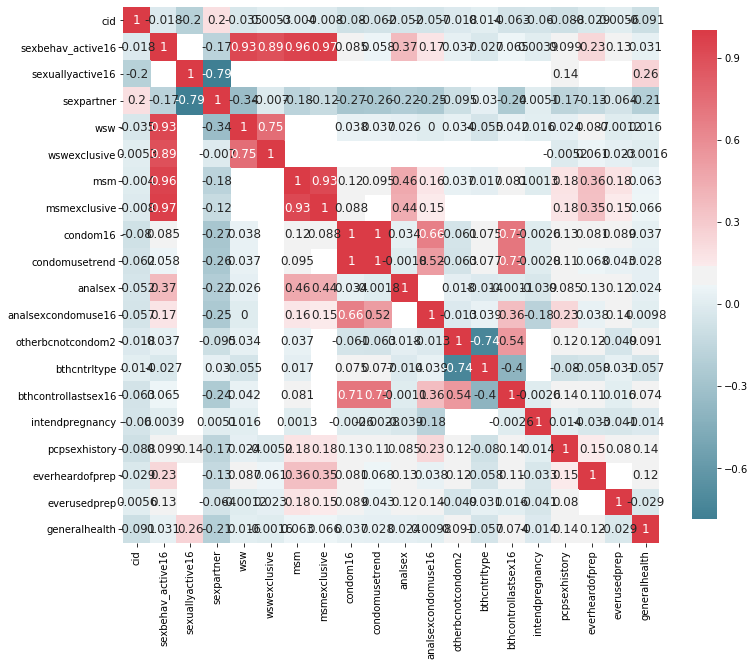

In [17]:
plot_correlation_map(sex_df)

Among all the features in the Sexual Behavior, only 3 features looks useful to me. **imputed_sexuallyactive18**(Sexually active in past 12 months), **imputed_sexpartner** (Number of male and female sex partners in the past 12 months) and **pcpsexhistory** (Thinking about the last time you visited your personal doctor or health care provider, did he or she ask you any questions about your sexual history?).

In [18]:
sex_df = df[['cid','sexuallyactive16','sexpartner','pcpsexhistory','generalhealth']]
sex_df.isnull().sum()


cid                   0
sexuallyactive16    966
sexpartner          966
pcpsexhistory       263
generalhealth        89
dtype: int64

In [19]:
sex_df_f = sex_df.dropna()
sex_df_f.describe()

,cid,sexuallyactive16,sexpartner,pcpsexhistory,generalhealth
count,8.794000e+03,8794.000000,8794.000000,8794.000000,8794.000000
mean,1.707523e+06,1.368092,1.780305,1.671139,2.760405
std,5.182341e+03,0.482314,0.757505,0.469826,1.146604
min,1.700001e+06,1.000000,1.000000,1.000000,1.000000
25%,1.702521e+06,1.000000,1.000000,1.000000,2.000000
50%,1.710024e+06,1.000000,2.000000,2.000000,3.000000
75%,1.712481e+06,2.000000,2.000000,2.000000,4.000000
max,1.714953e+06,2.000000,4.000000,2.000000,5.000000


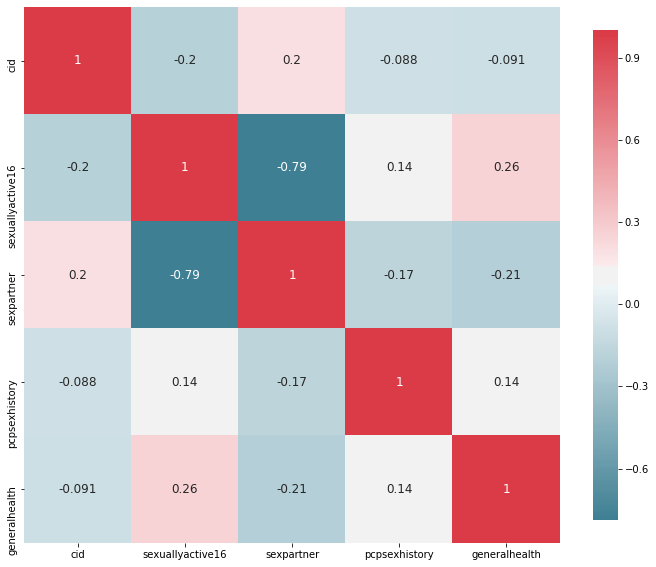

In [20]:
plot_correlation_map(sex_df)

Let us use the above 3 features to predict the general health.

In [21]:
#preparing training and test data
x=sex_df_f[['sexuallyactive16','sexpartner','pcpsexhistory']] 
y=sex_df_f[["generalhealth"]] 

In [22]:
model_apply(x,y,3,3)

[0.60966318 0.31699153 0.07334529]
Predicted Value: [3. 3. 3. ... 3. 2. 3.]
Accuracy: 0.3315143246930423
[[  0  40 303   0   0]
 [  0  51 479   0   0]
 [  0  57 678   0   0]
 [  0  21 399   0   0]
 [  0   4 167   0   0]]
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       343
         2.0       0.29      0.10      0.15       530
         3.0       0.33      0.92      0.49       735
         4.0       0.00      0.00      0.00       420
         5.0       0.00      0.00      0.00       171

    accuracy                           0.33      2199
   macro avg       0.13      0.20      0.13      2199
weighted avg       0.18      0.33      0.20      2199



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1.1631369980429915

**Analysing the Cancer Screening Data**

# Clubbing it All together

In [23]:
club_df = df[['cid','everhivtest16','sexuallyactive16','sexpartner','pcpsexhistory','fluvaccineshot','generalhealth']]
club_df.isnull().sum()

cid                   0
everhivtest16       328
sexuallyactive16    966
sexpartner          966
pcpsexhistory       263
fluvaccineshot       67
generalhealth        89
dtype: int64

In [24]:
club_df = club_df.dropna()
club_df.describe()

,cid,everhivtest16,sexuallyactive16,sexpartner,pcpsexhistory,fluvaccineshot,generalhealth
count,8.499000e+03,8499.000000,8499.000000,8499.000000,8499.000000,8499.000000,8499.000000
mean,1.707554e+06,1.347570,1.363337,1.786681,1.666667,1.524415,2.760325
std,5.180834e+03,0.476227,0.480989,0.757814,0.471432,0.499433,1.142515
min,1.700001e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.702538e+06,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
50%,1.710050e+06,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000
75%,1.712490e+06,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000
max,1.714953e+06,2.000000,2.000000,4.000000,2.000000,2.000000,5.000000


In [26]:
#preparing training and test data
x=club_df[['everhivtest16','sexuallyactive16','sexpartner','pcpsexhistory','fluvaccineshot']] 
y=club_df[["generalhealth"]] 

In [27]:
model_apply(x,y,3,5)

[0.41449843 0.20605283 0.18898264 0.14393893 0.04652718]
Predicted Value: [3. 3. 3. ... 2. 3. 2.]
Accuracy: 0.31576470588235295
[[  2  81 255   0   0]
 [  0 125 474   0   0]
 [  2 102 544   0   0]
 [  2  36 357   0   0]
 [  0   6 139   0   0]]
              precision    recall  f1-score   support

         1.0       0.33      0.01      0.01       338
         2.0       0.36      0.21      0.26       599
         3.0       0.31      0.84      0.45       648
         4.0       0.00      0.00      0.00       395
         5.0       0.00      0.00      0.00       145

    accuracy                           0.32      2125
   macro avg       0.20      0.21      0.15      2125
weighted avg       0.25      0.32      0.21      2125



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1.1507542283726995

**Correlating Number of Sex Partners with the HIV**

In [28]:
hiv_sp_df = df[['everhivtest16','sexpartner']]
hiv_sp_df.isnull().sum()

everhivtest16    328
sexpartner       966
dtype: int64

In [29]:
hiv_sp_df = hiv_sp_df.dropna()
hiv_sp_df.describe()

,everhivtest16,sexpartner
count,8765.000000,8765.000000
mean,1.350713,1.785967
std,0.477220,0.759278
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,2.000000,2.000000
max,2.000000,4.000000


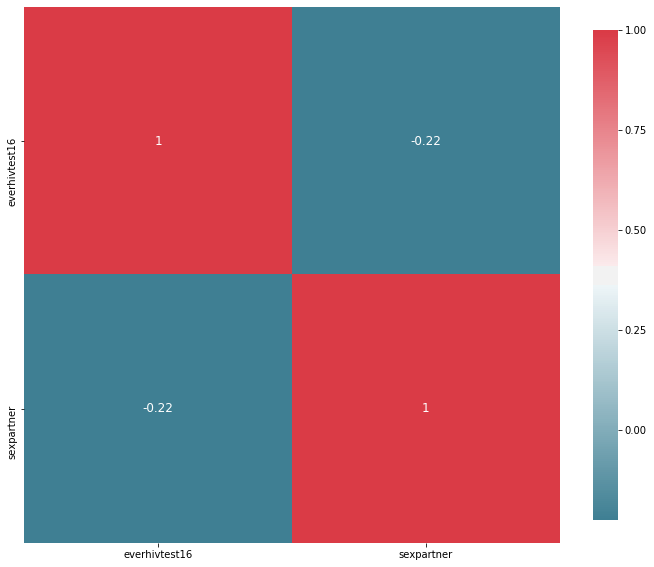

In [30]:
plot_correlation_map(hiv_sp_df)

In [33]:
#preparing training and test data
x=hiv_sp_df[["everhivtest16"]] 
y=hiv_sp_df[["sexpartner"]] 

In [34]:
model_apply(x,y,3,1)

[1.]
Predicted Value: [2. 1. 2. ... 2. 1. 2.]
Accuracy: 0.5533759124087592
[[379 423   0   0]
 [331 834   0   0]
 [ 21  77   0   0]
 [ 23 104   0   0]]
              precision    recall  f1-score   support

         1.0       0.50      0.47      0.49       802
         2.0       0.58      0.72      0.64      1165
         3.0       0.00      0.00      0.00        98
         4.0       0.00      0.00      0.00       127

    accuracy                           0.55      2192
   macro avg       0.27      0.30      0.28      2192
weighted avg       0.49      0.55      0.52      2192



//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.8376409348679321